In [3]:
import pandas as pd
import tensorflow as tf
import keras
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.models import Sequential
from keras.applications import InceptionV3
from keras.utils import to_categorical
from keras.layers import Dense, Flatten,BatchNormalization, Dropout, Lambda, Conv2D, MaxPool2D
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping  # Import EarlyStopping
from keras.metrics import Precision, Recall  # Import Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score



%matplotlib inline

In [4]:
data = pd.read_pickle(r'C:\Users\User\Downloads\data1.pickle\data1.pickle')

In [5]:
def resize(img_batch, method='nearest'):
    # Assuming img_batch is of shape (number_of_images, 32, 32, 3)
    number_of_images = img_batch.shape[0]
    new_array = np.zeros((number_of_images, 64, 64, 3))
    
    for i in range(number_of_images):
        # Resizing each image in the batch to (64, 64) using the specified method
        # 'nearest' method can make the resized images appear sharper
        new_array[i] = tf.image.resize(img_batch[i], (64, 64), method=method).numpy()
    
    return new_array

NumberofClass = 43

x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']
x_val = data['x_validation']
y_val = data['y_validation']

x_train = x_train.swapaxes(1,2)
x_train = x_train.swapaxes(2,3)
x_test = x_test.swapaxes(1,2)
x_test = x_test.swapaxes(2,3)
x_val = x_val.swapaxes(1,2)
x_val = x_val.swapaxes(2,3)

y_train = to_categorical(y_train, num_classes = NumberofClass)
y_val = to_categorical(y_val, num_classes = NumberofClass)
y_test = to_categorical(y_test, num_classes = NumberofClass)


x_train = resize(x_train)
x_test = resize(x_test)
x_val = resize(x_val)

array([25, 11, 38, ...,  8, 33, 10], dtype=uint8)

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


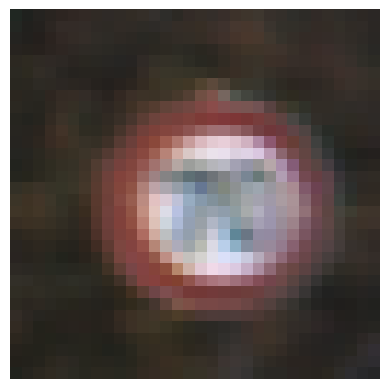

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


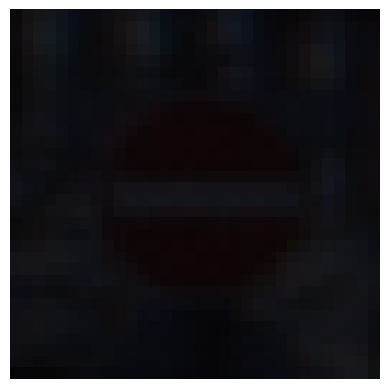

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


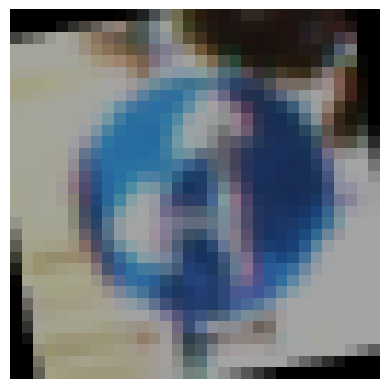

In [7]:
lst = [5, 532, 2151]
for i in lst:
    print(y_train[i])
    plt.imshow(x_train[i])
    plt.axis('off')
    plt.show()


In [12]:
x_test[0]

array([[[0.22745098, 0.2       , 0.16470589],
        [0.22745098, 0.2       , 0.16470589],
        [0.23137255, 0.2       , 0.15294118],
        ...,
        [0.80392158, 0.84705883, 0.9137255 ],
        [0.79607844, 0.84705883, 0.91764706],
        [0.79607844, 0.84705883, 0.91764706]],

       [[0.22745098, 0.2       , 0.16470589],
        [0.22745098, 0.2       , 0.16470589],
        [0.23137255, 0.2       , 0.15294118],
        ...,
        [0.80392158, 0.84705883, 0.9137255 ],
        [0.79607844, 0.84705883, 0.91764706],
        [0.79607844, 0.84705883, 0.91764706]],

       [[0.19215687, 0.17647059, 0.14509805],
        [0.19215687, 0.17647059, 0.14509805],
        [0.20392157, 0.20392157, 0.17254902],
        ...,
        [0.80784315, 0.85490197, 0.9254902 ],
        [0.80000001, 0.8509804 , 0.9254902 ],
        [0.80000001, 0.8509804 , 0.9254902 ]],

       ...,

       [[0.24705882, 0.23137255, 0.18039216],
        [0.24705882, 0.23137255, 0.18039216],
        [0.40000001, 0

In [7]:
# Model definition
model = Sequential([
    Flatten(input_shape=(64, 64, 3)),  # Flatten the input images to 1D vectors
    Dense(NumberofClass, activation='softmax')  # Logistic regression/softmax layer
])

# Compile the model with precision and recall in the metrics
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0.001, patience=3, verbose=1, restore_best_weights=True)
        
# Training the model with early stopping
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[early_stopping])

# Use model.predict to get the raw model predictions
predictions = model.predict(x_test)

# Convert predictions from probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='macro')
recall = recall_score(true_classes, predicted_classes, average='macro')

# print the results
print(f'Test accuracy: {accuracy}, Test precision: {precision}, Test recall: {recall}')

Epoch 1/20
2719/2719 [==============================] - 15s 5ms/step - loss: 1.6786 - accuracy: 0.6536 - precision: 0.8033 - recall: 0.4853 - val_loss: 1.7473 - val_accuracy: 0.6605 - val_precision: 0.7286 - val_recall: 0.5687
Epoch 2/20
2719/2719 [==============================] - 14s 5ms/step - loss: 1.0797 - accuracy: 0.7884 - precision: 0.8605 - recall: 0.6886 - val_loss: 1.6921 - val_accuracy: 0.7048 - val_precision: 0.7738 - val_recall: 0.6440
Epoch 3/20
2719/2719 [==============================] - 15s 6ms/step - loss: 0.9332 - accuracy: 0.8207 - precision: 0.8770 - recall: 0.7467 - val_loss: 1.7303 - val_accuracy: 0.7342 - val_precision: 0.7762 - val_recall: 0.6819
Epoch 4/20
2719/2719 [==============================] - 15s 6ms/step - loss: 0.8703 - accuracy: 0.8350 - precision: 0.8825 - recall: 0.7743 - val_loss: 1.8133 - val_accuracy: 0.7540 - val_precision: 0.7964 - val_recall: 0.7175
Epoch 5/20
2719/2719 [==============================] - 14s 5ms/step - loss: 0.7789 - accura

In [9]:
# Model definition with more layers
model = Sequential([
    Flatten(input_shape=(64, 64, 3)),  # Flatten the input images to 1D vectors
    Dense(64, activation='relu'),  # First hidden layer with ReLU activation
    Dense(64, activation='relu'),   # Second hidden layer with ReLU activation
    Dense(32, activation='relu'),   # Third hidden layer with ReLU activation
    Dense(32, activation='relu'),   # Fourth hidden layer with ReLU activation
    Dense(NumberofClass, activation='softmax')  # Output layer with softmax activation for multi-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0.001, patience=3, verbose=1, restore_best_weights=True)

# Training the model with early stopping
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[early_stopping])

# Use model.predict to get the raw model predictions
predictions = model.predict(x_test)

# Convert predictions from probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='macro')
recall = recall_score(true_classes, predicted_classes, average='macro')

# print the results
print(f'Test accuracy: {accuracy}, Test precision: {precision}, Test recall: {recall}')

Epoch 1/20
2719/2719 [==============================] - 21s 7ms/step - loss: 1.8583 - accuracy: 0.4746 - val_loss: 1.4982 - val_accuracy: 0.5932
Epoch 2/20
2719/2719 [==============================] - 19s 7ms/step - loss: 0.8855 - accuracy: 0.7527 - val_loss: 1.0875 - val_accuracy: 0.7304
Epoch 3/20
2719/2719 [==============================] - 19s 7ms/step - loss: 0.6556 - accuracy: 0.8167 - val_loss: 0.9882 - val_accuracy: 0.7460
Epoch 4/20
2719/2719 [==============================] - 19s 7ms/step - loss: 0.5372 - accuracy: 0.8478 - val_loss: 0.8895 - val_accuracy: 0.7864
Epoch 5/20
2719/2719 [==============================] - 19s 7ms/step - loss: 0.4761 - accuracy: 0.8642 - val_loss: 0.8402 - val_accuracy: 0.8086
Epoch 6/20
2719/2719 [==============================] - 19s 7ms/step - loss: 0.4228 - accuracy: 0.8784 - val_loss: 0.8385 - val_accuracy: 0.8032
Epoch 7/20
2719/2719 [==============================] - 18s 7ms/step - loss: 0.3892 - accuracy: 0.8884 - val_loss: 0.8171 - val_ac

In [14]:
#CNN model
model = Sequential()


model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "Same", activation = "relu", input_shape = (64,64,3)))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "Same", activation = "relu" ))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = "Same", activation = "relu" ))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = "Same", activation = "relu" ))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(units = 256, activation = "relu"))

model.add(Dropout(0.5))

model.add(BatchNormalization())

model.add(Dense(units = NumberofClass, activation = "softmax"))

model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0.001, patience=3, verbose=1, restore_best_weights=True)
hist = model.fit(x_train, y_train, batch_size = 32,
                    epochs = 20, validation_data = (x_val, y_val),callbacks=[early_stopping])

predictions = model.predict(x_test)

# Convert predictions from probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='macro')
recall = recall_score(true_classes, predicted_classes, average='macro')

# print the results
print(f'Test accuracy: {accuracy}, Test precision: {precision}, Test recall: {recall}')

Epoch 1/20
2719/2719 [==============================] - 335s 122ms/step - loss: 1.1096 - accuracy: 0.6742 - val_loss: 0.3356 - val_accuracy: 0.9020
Epoch 2/20
2719/2719 [==============================] - 318s 117ms/step - loss: 0.2183 - accuracy: 0.9330 - val_loss: 0.2452 - val_accuracy: 0.9299
Epoch 3/20
2719/2719 [==============================] - 266s 98ms/step - loss: 0.1412 - accuracy: 0.9557 - val_loss: 0.1575 - val_accuracy: 0.9501
Epoch 4/20
2719/2719 [==============================] - 264s 97ms/step - loss: 0.1079 - accuracy: 0.9665 - val_loss: 0.1758 - val_accuracy: 0.9587
Epoch 5/20
2719/2719 [==============================] - 267s 98ms/step - loss: 0.0903 - accuracy: 0.9716 - val_loss: 0.1888 - val_accuracy: 0.9596
Epoch 6/20
2719/2719 [==============================] - 270s 99ms/step - loss: 0.0765 - accuracy: 0.9763 - val_loss: 0.1021 - val_accuracy: 0.9671
Epoch 7/20
2719/2719 [==============================] - 271s 99ms/step - loss: 0.0683 - accuracy: 0.9788 - val_loss: